In [1]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [2]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

In [3]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 22s 22ms/step - loss: 0.1625 - accuracy: 0.9492
Epoch 2/5
938/938 [==============================] - 21s 22ms/step - loss: 0.0449 - accuracy: 0.9861
Epoch 3/5
938/938 [==============================] - 20s 22ms/step - loss: 0.0308 - accuracy: 0.9907
Epoch 4/5
938/938 [==============================] - 21s 22ms/step - loss: 0.0240 - accuracy: 0.9928
Epoch 5/5
938/938 [==============================] - 21s 22ms/step - loss: 0.0179 - accuracy: 0.9947


In [4]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"테스트 정확도: {test_acc:.3f}")

313/313 [==============================] - 3s 8ms/step - loss: 0.0302 - accuracy: 0.9901
테스트 정확도: 0.990


In [6]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model_no_max_pool = keras.Model(inputs=inputs, outputs=outputs)

In [7]:
model_no_max_pool.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_8 (Conv2D)           (None, 22, 22, 128)       73856     
                                                                 
 flatten_2 (Flatten)         (None, 61952)             0         
                                                                 
 dense_2 (Dense)             (None, 10)                619530    
                                                                 
Total params: 712202 (2.72 MB)
Trainable params: 712202 (2.

In [10]:
!kaggle competitions download -c dogs-vs-cats

100%|███████████████████████████████████████▉| 811M/812M [01:13<00:00, 12.4MB/s]
100%|████████████████████████████████████████| 812M/812M [01:13<00:00, 11.5MB/s]


In [11]:
!unzip -qq dogs-vs-cats.zip

In [12]:
!unzip -qq train.zip

In [5]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")
def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname, dst=dir / fname)
            
#make_subset("train", start_index=0, end_index=1000)
#make_subset("validation", start_index=1000, end_index=1500)
#make_subset("test", start_index=1500, end_index=2500)

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

# 이 모델은 180 X 180 크기의 RGB 이미지를 입력으로 받는다
inputs = keras.Input(shape=(180, 180, 3))
# 입력을 255로 나누어 [0, 1] 범위로 스케일을 조정한다
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

2024-02-02 19:08:15.390336: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-02 19:08:15.396165: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-02 19:08:15.476281: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-02 19:08:15.476341: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-02 19:08:15.478185: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [2]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                        

In [3]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [6]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32,
)

validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32,
)

test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32,
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [7]:
for data_batch, labels_batch in train_dataset:
    print("데이터 배치 크기:", data_batch.shape)
    print("레이블 배치 크기:", labels_batch.shape)
    break

데이터 배치 크기: (32, 180, 180, 3)
레이블 배치 크기: (32,)


In [8]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss",
    )
]

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks,
)

Epoch 1/30
63/63 [==============================] - 62s 946ms/step - loss: 0.6983 - accuracy: 0.5135 - val_loss: 0.6904 - val_accuracy: 0.6020
Epoch 2/30
63/63 [==============================] - 62s 985ms/step - loss: 0.6920 - accuracy: 0.5660 - val_loss: 0.6659 - val_accuracy: 0.6090
Epoch 3/30
63/63 [==============================] - 63s 998ms/step - loss: 0.6655 - accuracy: 0.6035 - val_loss: 1.1021 - val_accuracy: 0.5030
Epoch 4/30
63/63 [==============================] - 56s 883ms/step - loss: 0.6382 - accuracy: 0.6435 - val_loss: 0.6949 - val_accuracy: 0.5380
Epoch 5/30
63/63 [==============================] - 55s 867ms/step - loss: 0.6142 - accuracy: 0.6670 - val_loss: 0.7129 - val_accuracy: 0.5390
Epoch 6/30
63/63 [==============================] - 55s 869ms/step - loss: 0.5682 - accuracy: 0.6980 - val_loss: 0.5821 - val_accuracy: 0.6930
Epoch 7/30
63/63 [==============================] - 60s 955ms/step - loss: 0.5558 - accuracy: 0.7225 - val_loss: 0.5791 - val_accuracy: 0.6950

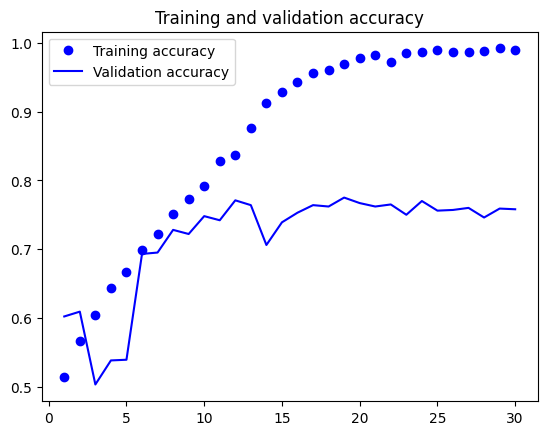

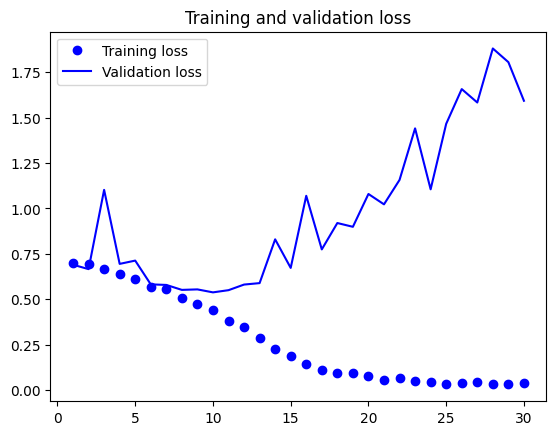

In [9]:
import matplotlib.pyplot as plt

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [10]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"테스트 정확도: {test_acc:.3f}")

63/63 [==============================] - 16s 239ms/step - loss: 0.5604 - accuracy: 0.7375
테스트 정확도: 0.738


In [11]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

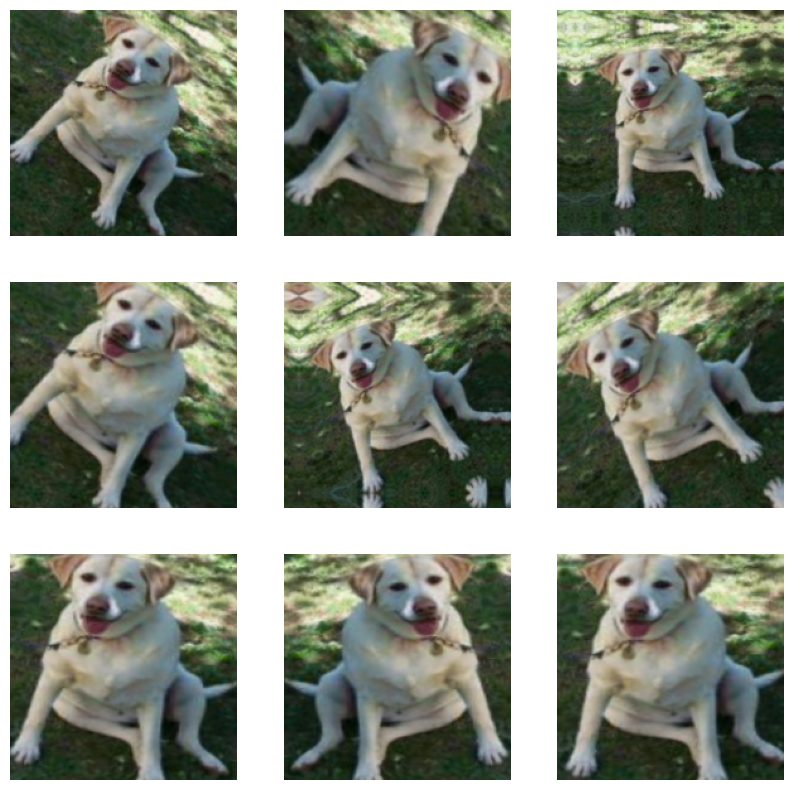

In [12]:
plt.figure(figsize=(10, 10))
# take(N)을 사용하여 데이터셋에서 N개의 배치만 샘플링한다
for images, _ in train_dataset.take(1):
    for i in range(9):
        # 배치 이미지에 데이터 증식을 적용한다
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        # 배치 출력에서 첫 번째 이미지를 출력한다
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [13]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [14]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss",
    )
]

history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks,
)

Epoch 1/100
63/63 [==============================] - 67s 1s/step - loss: 0.6965 - accuracy: 0.5070 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 2/100
63/63 [==============================] - 67s 1s/step - loss: 0.6942 - accuracy: 0.5380 - val_loss: 0.6901 - val_accuracy: 0.5010
Epoch 3/100
63/63 [==============================] - 63s 1s/step - loss: 0.6904 - accuracy: 0.5610 - val_loss: 0.7230 - val_accuracy: 0.5000
Epoch 4/100
63/63 [==============================] - 63s 1s/step - loss: 0.6839 - accuracy: 0.5960 - val_loss: 0.6605 - val_accuracy: 0.6380
Epoch 5/100
63/63 [==============================] - 64s 1s/step - loss: 0.6776 - accuracy: 0.6065 - val_loss: 0.6689 - val_accuracy: 0.5680
Epoch 6/100
63/63 [==============================] - 59s 930ms/step - loss: 0.6357 - accuracy: 0.6355 - val_loss: 0.6867 - val_accuracy: 0.6230
Epoch 7/100
63/63 [==============================] - 60s 947ms/step - loss: 0.6238 - accuracy: 0.6640 - val_loss: 0.5875 - val_accuracy: 0.6900
Epoch 8

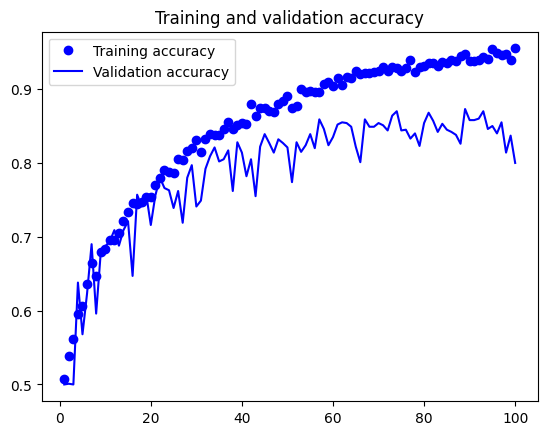

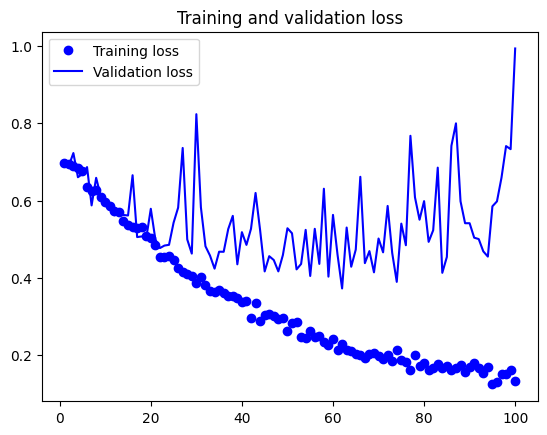

In [15]:
import matplotlib.pyplot as plt

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [16]:
test_model = keras.models.load_model("convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"테스트 정확도: {test_acc:.3f}")

63/63 [==============================] - 12s 182ms/step - loss: 0.4664 - accuracy: 0.8435
테스트 정확도: 0.844


In [17]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3)
)

58889256/58889256 [==============================] - 34s 1us/step


In [18]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [19]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels = get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(validation_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)

1/1 [==============================] - 2s 2s/step


In [21]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs, outputs)

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction.keras",
        save_best_only=True,
        monitor="val_loss",
    )
]

history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks,
)

Epoch 1/20
63/63 [==============================] - 2s 28ms/step - loss: 24.2701 - accuracy: 0.9215 - val_loss: 3.9405 - val_accuracy: 0.9700
Epoch 2/20
63/63 [==============================] - 1s 24ms/step - loss: 3.7136 - accuracy: 0.9770 - val_loss: 6.7884 - val_accuracy: 0.9620
Epoch 3/20
63/63 [==============================] - 1s 24ms/step - loss: 3.1093 - accuracy: 0.9785 - val_loss: 6.9941 - val_accuracy: 0.9630
Epoch 4/20
63/63 [==============================] - 1s 21ms/step - loss: 0.2981 - accuracy: 0.9950 - val_loss: 6.3099 - val_accuracy: 0.9700
Epoch 5/20
63/63 [==============================] - 1s 21ms/step - loss: 1.5496 - accuracy: 0.9880 - val_loss: 5.1863 - val_accuracy: 0.9740
Epoch 6/20
63/63 [==============================] - 1s 22ms/step - loss: 0.5384 - accuracy: 0.9950 - val_loss: 4.3414 - val_accuracy: 0.9780
Epoch 7/20
63/63 [==============================] - 1s 21ms/step - loss: 0.2114 - accuracy: 0.9965 - val_loss: 6.5184 - val_accuracy: 0.9730
Epoch 8/20
6

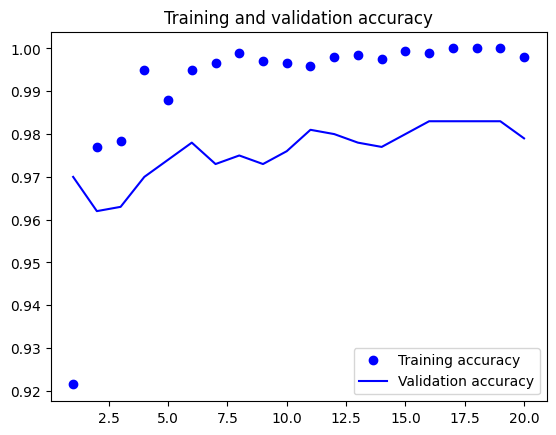

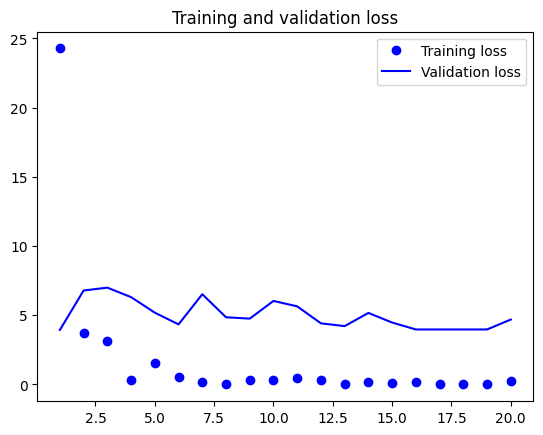

In [22]:
import matplotlib.pyplot as plt

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [23]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
)
conv_base.trainable = False

In [24]:
conv_base.trainable = True
print("합성곱 기반 층을 동결하기 전의 훈련 가능한 가중치 개수:", len(conv_base.trainable_weights))
conv_base.trainable = False
print("합성곱 기반 층을 동결한 후의 훈련 가능한 가중치 개수:", len(conv_base.trainable_weights))

합성곱 기반 층을 동결하기 전의 훈련 가능한 가중치 개수: 26
합성곱 기반 층을 동결한 후의 훈련 가능한 가중치 개수: 0


In [27]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.layers.Lambda(lambda x: keras.applications.vgg16.preprocess_input(x))(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs, outputs)

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [28]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss",
    )
]

history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks,
)

Epoch 1/50
63/63 [==============================] - 301s 5s/step - loss: 2.0951 - accuracy: 0.8735 - val_loss: 0.9557 - val_accuracy: 0.9440
Epoch 2/50
63/63 [==============================] - 416s 7s/step - loss: 1.0717 - accuracy: 0.9310 - val_loss: 0.7050 - val_accuracy: 0.9670
Epoch 3/50
63/63 [==============================] - 377s 6s/step - loss: 0.8715 - accuracy: 0.9415 - val_loss: 0.6866 - val_accuracy: 0.9680
Epoch 4/50
63/63 [==============================] - 399s 6s/step - loss: 0.9119 - accuracy: 0.9475 - val_loss: 0.5271 - val_accuracy: 0.9760
Epoch 5/50
63/63 [==============================] - 361s 6s/step - loss: 0.7300 - accuracy: 0.9550 - val_loss: 0.5447 - val_accuracy: 0.9770
Epoch 6/50
63/63 [==============================] - 364s 6s/step - loss: 0.6892 - accuracy: 0.9585 - val_loss: 0.5629 - val_accuracy: 0.9770
Epoch 7/50
63/63 [==============================] - 365s 6s/step - loss: 0.6191 - accuracy: 0.9600 - val_loss: 0.3874 - val_accuracy: 0.9780
Epoch 8/50
63

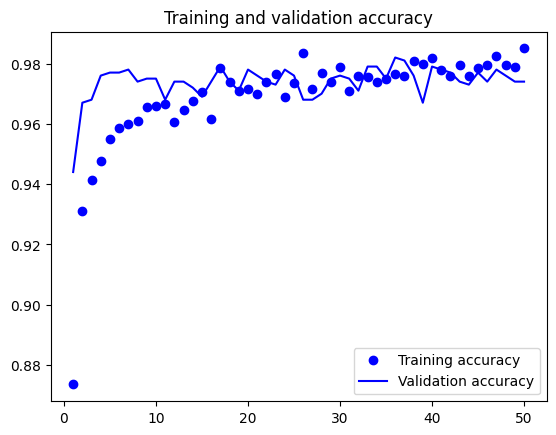

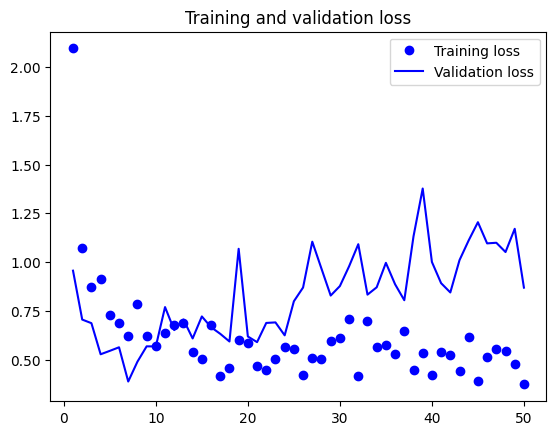

In [29]:
import matplotlib.pyplot as plt

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [31]:
test_model = keras.models.load_model("feature_extraction_with_data_augmentation.keras", safe_mode=False)
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"테스트 정확도: {test_acc:.3f}")

63/63 [==============================] - 235s 4s/step - loss: 0.5102 - accuracy: 0.9715
테스트 정확도: 0.971


In [32]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [33]:
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              loss="binary_crossentropy",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss",
    )
]

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks,
)

Epoch 1/30
63/63 [==============================] - 399s 6s/step - loss: 0.4197 - accuracy: 0.9805 - val_loss: 1.0417 - val_accuracy: 0.9760
Epoch 2/30
63/63 [==============================] - 399s 6s/step - loss: 0.4444 - accuracy: 0.9810 - val_loss: 0.6950 - val_accuracy: 0.9780
Epoch 3/30
63/63 [==============================] - 400s 6s/step - loss: 0.5053 - accuracy: 0.9775 - val_loss: 0.8235 - val_accuracy: 0.9780
Epoch 4/30
63/63 [==============================] - 398s 6s/step - loss: 0.3430 - accuracy: 0.9840 - val_loss: 0.9906 - val_accuracy: 0.9760
Epoch 5/30
63/63 [==============================] - 398s 6s/step - loss: 0.4345 - accuracy: 0.9795 - val_loss: 0.8517 - val_accuracy: 0.9780
Epoch 6/30
63/63 [==============================] - 399s 6s/step - loss: 0.3515 - accuracy: 0.9850 - val_loss: 0.8837 - val_accuracy: 0.9780
Epoch 7/30
63/63 [==============================] - 399s 6s/step - loss: 0.4125 - accuracy: 0.9835 - val_loss: 0.7019 - val_accuracy: 0.9790
Epoch 8/30
63

In [35]:
model = keras.models.load_model("fine_tuning.keras", safe_mode=False)
test_loss, test_acc = model.evaluate(test_dataset)
print(f"테스트 정확도: {test_acc:.3f}")

63/63 [==============================] - 265s 4s/step - loss: 0.7939 - accuracy: 0.9740
테스트 정확도: 0.974
